# <font color='dark'>**Seleção e agrupamento de dados com pandas**</font>

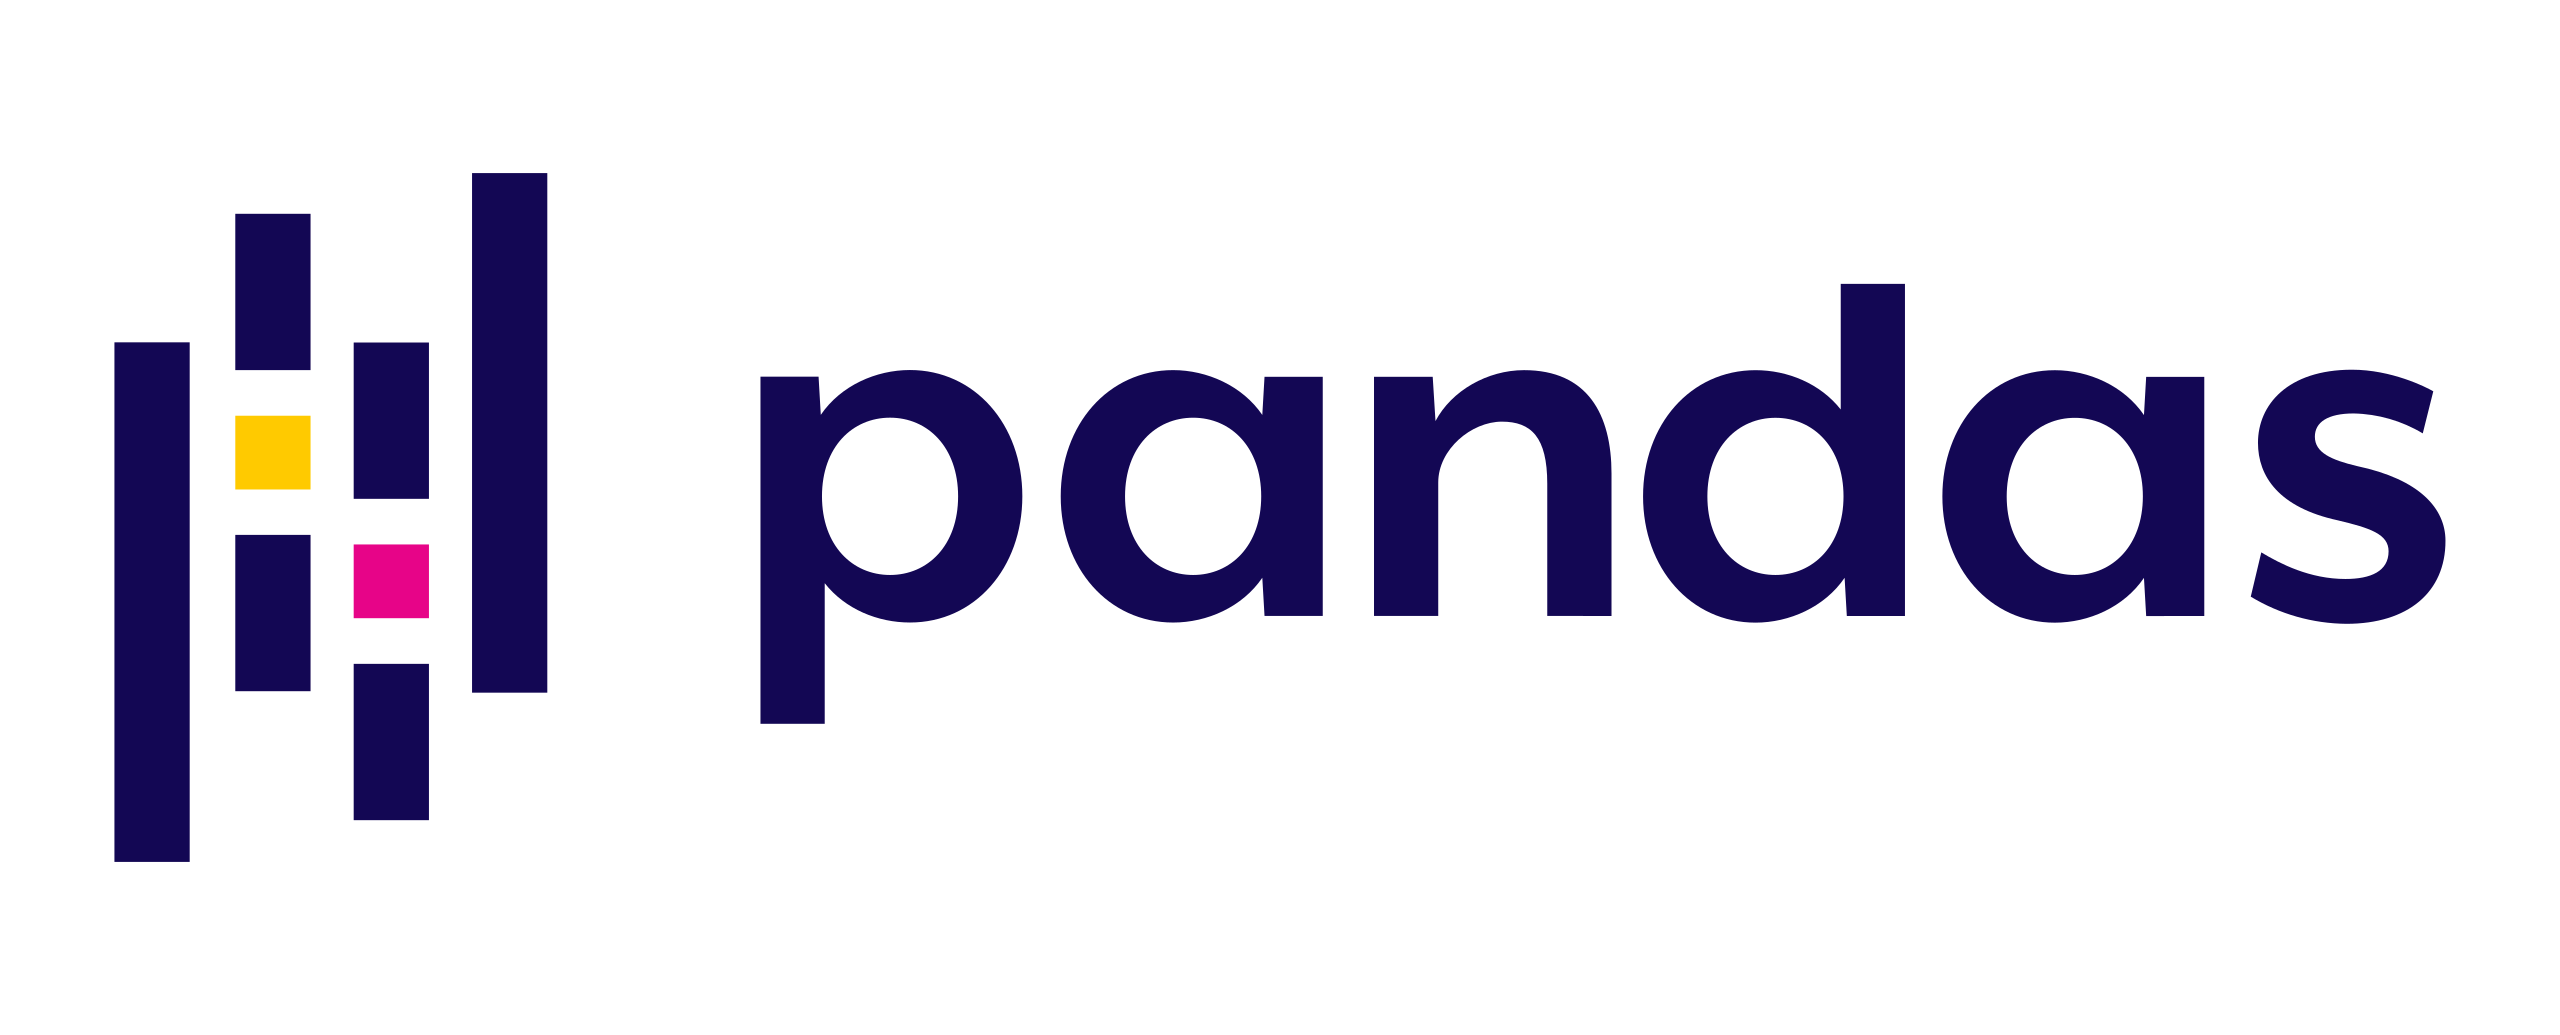

### Fazendo a leitura dos dados

Vamos analisar dados de emissões de gases de efeito estufa no território brasileiro e criar tabelas e visualizações para entender os dados e gerar insights a partir deles. Os dados foram extraídos do SEEG.

---
ℹ Fonte: SEEG - Sistema de Estimativa de Emissões e Remoções de Gases de Efeito Estufa, Observatório do Clima, acessado em http://seeg.eco.br:

- [Download da base de dados](http://seeg.eco.br/download)
---

Primeiramente, vamos importar a biblioteca [`pandas`](https://pandas.pydata.org/docs/index.html) e os dados que serão utilizados. Como os dados estão em um arquivo excel, vamos usar a função [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [ ]:
import pandas as pd

In [ ]:
emissoes_gases = pd.read_excel('https://github.com/lukaswyllis/formacao_python_para_data_science/raw/refs/heads/master/pandas3/dados_seeg10_geral_br.xlsx', sheet_name = 'GEE Estados')

In [ ]:
emissoes_gases

Vamos checar a estrutura do nosso DataFrame com o uso do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info), que retorna a quantidade de linhas e colunas, bem como a informação de quantidade de dados nulos e tipos de dados para cada uma das colunas.

In [ ]:
emissoes_gases.info()

### Ajustando a base de dados

Estamos interessados somente na emissão de gases gerados pelos estados que estejam no inventário nacional, portanto vamos identificar os tipos de dados únicos da coluna *Emissão / Remoção / Bunker*.

---
ℹ
- *Remoções são dados referentes à retirada dos gases estufa, que é o contrário da emissão*
- *NCI são dados não contemplados no inventário nacional*
- *Bunkers são emissões de transporte marítimo e aéreo internacional, portanto não são emissões diretas dos estados.*

*Informação disponível no site do SEEG: https://seeg.eco.br/entenda-as-estimativas*

---

In [ ]:
emissoes_gases['Emissão / Remoção / Bunker'].unique()

Vamos checar primeiro os dados de remoção, para identificar se todos eles são de retirada de gases estufa.

In [ ]:
(emissoes_gases['Emissão / Remoção / Bunker'] == 'Remoção NCI') | (emissoes_gases['Emissão / Remoção / Bunker'] == 'Remoção')

In [ ]:
emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção'])]

In [ ]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021]

Para identificar se todos os valores são negativos, vamos utilizar a função `max()` para checar se tem algum valor maior do que 0.

In [ ]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021].max()

Vamos também identificar se algum valor do tipo *Bunker* corresponde a alguma emissão feita por algum estado.

In [ ]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'] == 'Bunker', 'Estado'].unique()

In [ ]:
emissoes_gases = emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'] == 'Emissão']
emissoes_gases

Como não restou nenhum valor útil para análise na coluna de *Emissão / Remoção / Bunker*, vamos removê-la por completo da base de dados.

In [ ]:
emissoes_gases = emissoes_gases.drop(columns = 'Emissão / Remoção / Bunker')
emissoes_gases

In [ ]:
emissoes_gases.loc[:,'Nível 1 - Setor':'Produto'].columns

In [ ]:
colunas_info = list(emissoes_gases.loc[:,'Nível 1 - Setor':'Produto'].columns)
colunas_info

In [ ]:
emissoes_gases.loc[:,1970:2021].columns

In [ ]:
colunas_emissao = list(emissoes_gases.loc[:,1970:2021].columns)
colunas_emissao

In [ ]:
emissoes_gases.melt(id_vars=colunas_info, value_vars=colunas_emissao, var_name='Ano', value_name='Emissão')

In [ ]:
emissoes_por_ano = emissoes_gases.melt(id_vars=colunas_info, value_vars=colunas_emissao, var_name='Ano', value_name='Emissão')
emissoes_por_ano

In [ ]:
emissoes_por_ano.groupby('Gás')

In [ ]:
emissoes_por_ano.groupby('Gás').groups

In [ ]:
emissoes_por_ano.groupby('Gás').get_group('CO2 (t)')

In [25]:
emissoes_por_ano.groupby('Gás').sum(numeric_only=True)

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [31]:
emissoes_por_ano.groupby('Gás')['Emissão'].sum()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [33]:
emissao_por_gas = emissoes_por_ano.groupby('Gás')['Emissão'].sum().sort_values(ascending=False)
emissao_por_gas

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


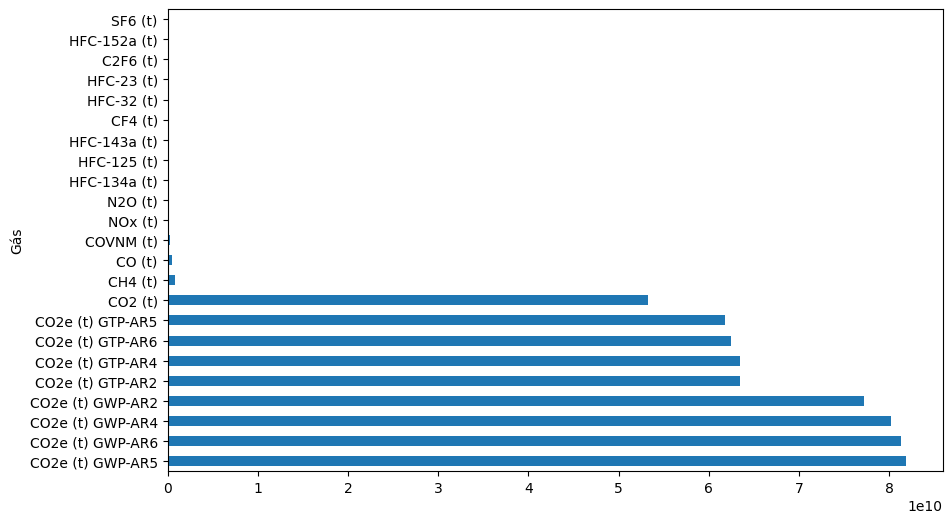

In [34]:
emissao_por_gas.plot(kind='barh', figsize=(10, 6));

In [37]:
emissao_por_gas.iloc[0:9]

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


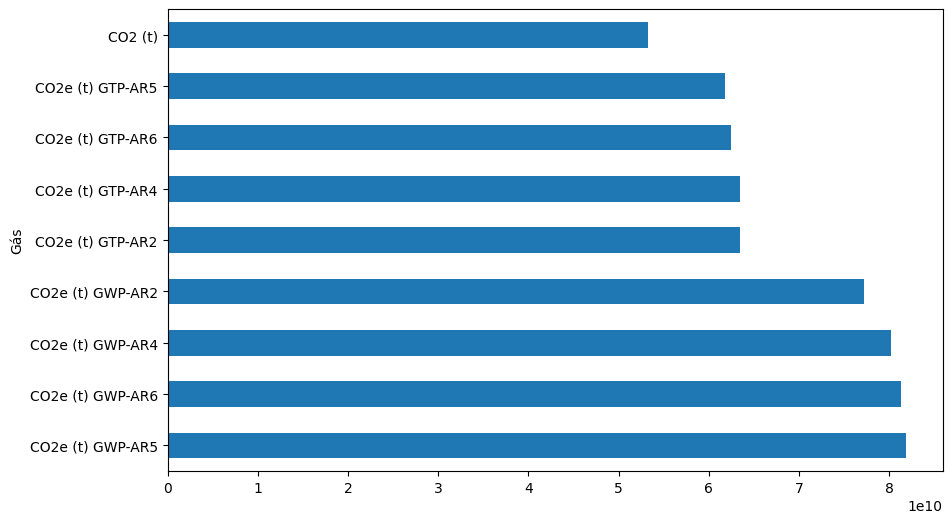

In [38]:
emissao_por_gas.iloc[0:9].plot(kind='barh', figsize=(10, 6));

In [50]:
percentual = round(emissao_por_gas.iloc[0:9].sum()/emissao_por_gas.sum()*100, 2)
percentual

99.74

In [51]:
print(f'A emissão de CO2 corresponde a {percentual}% de emissão total de gases estufa no Brasil de 1970 a 2021. ')

A emissão de CO2 corresponde a 99.74% de emissão total de gases estufa no Brasil de 1970 a 2021. 


In [52]:
gas_por_setor = emissoes_por_ano.groupby(['Gás', 'Nível 1 - Setor'])[['Emissão']].sum()
gas_por_setor

Emissão
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             9.361215e+07
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

In [53]:
gas_por_setor.xs('CO2 (t)', level=0)

,Emissão
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [54]:
gas_por_setor.xs(('CO2 (t)', 'Mudança de Uso da Terra e Floresta'), level = [0, 1])

,,Emissão
Gás,Nível 1 - Setor,
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10


In [56]:
gas_por_setor.xs('CO2 (t)', level=0).max()

,0
Emissão,3.733930e+10


In [57]:
gas_por_setor.xs('CO2 (t)', level=0).idxmax()

,0
Emissão,Mudança de Uso da Terra e Floresta


In [58]:
gas_por_setor.groupby(level = 0).idxmax()

,Emissão
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


In [59]:
gas_por_setor.groupby(level = 0).max()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),5.928481e+08
CO (t),3.959769e+08
CO2 (t),3.733930e+10
CO2e (t) GTP-AR2,3.850044e+10
CO2e (t) GTP-AR4,3.850044e+10
CO2e (t) GTP-AR5,3.831675e+10
CO2e (t) GTP-AR6,3.843359e+10


In [62]:
valores_max = gas_por_setor.groupby(level = 0).max().values

In [65]:
tabela_sumarizada = gas_por_setor.groupby(level = 0).idxmax()
tabela_sumarizada.insert(1, 'Quantidade de emissão', valores_max)
tabela_sumarizada

,Emissão,Quantidade de emissão
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


In [66]:
gas_por_setor.swaplevel(0, 1)

Emissão
Nível 1 - Setor                    Gás                   
Processos Industriais              C2F6 (t)  5.765018e+02
                                   CF4 (t)   7.135481e+03
Agropecuária                       CH4 (t)   5.928481e+08
Energia                            CH4 (t)   3.429034e+07
Mudança de Uso da Terra e Floresta CH4 (t)   8.662166e+07
...                                                   ...
Resíduos                           N2O (t)   2.764127e+05
Agropecuária                       NOx (t)   2.602719e+06
Energia                            NOx (t)   9.361215e+07
Processos Industriais              NOx (t)   3.546360e+06
                                   SF6 (t)   4.705800e+02

[72 rows x 1 columns]

In [68]:
gas_por_setor.swaplevel(0, 1).groupby(level = 0).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


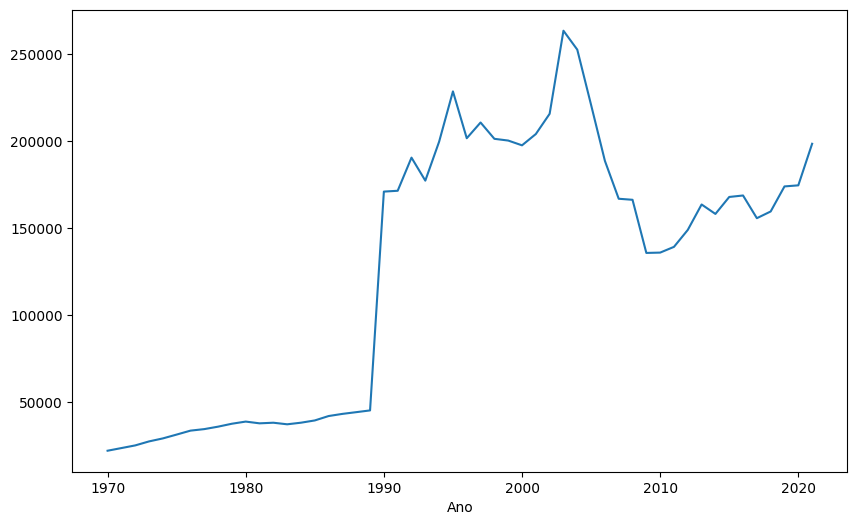

In [81]:
emissoes_por_ano.groupby('Ano')['Emissão'].mean().plot(figsize = (10, 6));


In [82]:
emissoes_por_ano.groupby('Ano')['Emissão'].mean().idxmax()

2003

In [83]:
emissoes_por_ano.groupby(['Ano', 'Gás'])['Emissão'].mean()

Ano   Gás       
1970  C2F6 (t)          0.232610
      CF4 (t)           3.557421
      CH4 (t)        1471.024024
      CO (t)         2155.556658
      CO2 (t)       19244.913199
                        ...     
2021  HFC-23 (t)        0.000000
      HFC-32 (t)      261.100000
      N2O (t)         119.295311
      NOx (t)         679.395431
      SF6 (t)           5.240000
Name: Emissão, Length: 1196, dtype: float64

In [85]:
media_emissao_anual = emissoes_por_ano.groupby(['Ano', 'Gás'])['Emissão'].mean().reset_index()
media_emissao_anual

,Ano,Gás,Emissão
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1471.024024
3,1970,CO (t),2155.556658
4,1970,CO2 (t),19244.913199
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.295311
1194,2021,NOx (t),679.395431


In [86]:
media_emissao_anual = media_emissao_anual.pivot_table(index='Ano', columns = 'Gás', values = 'Emissão')
media_emissao_anual

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Ano,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.632709,154.072797,0.000
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.609237,170.550178,0.000
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.311864,188.856161,0.000
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.278689,217.320480,0.000
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.098183,247.521415,0.000
1975,0.502952,7.691893,1854.360821,2730.894830,32292.965771,30593.767465,30593.767465,28507.669059,29285.642221,48944.729581,...,1065.682750,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.451008,262.716346,0.000
1976,0.577172,8.826970,1932.641716,2702.494362,35640.344723,33066.878007,33066.878007,30879.481709,31693.226162,52203.028009,...,1091.778909,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.583225,287.013048,0.000
1977,0.692855,10.596169,1931.897645,2675.992077,37313.909077,34182.312333,34182.312333,31967.243034,32784.131397,53333.605735,...,1147.712448,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.571086,292.405821,0.000
1978,0.749660,11.464915,1921.281930,2755.891877,40669.820049,35969.633601,35969.633601,33762.778999,34580.720998,55015.291182,...,1289.853564,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.426649,322.982906,0.000


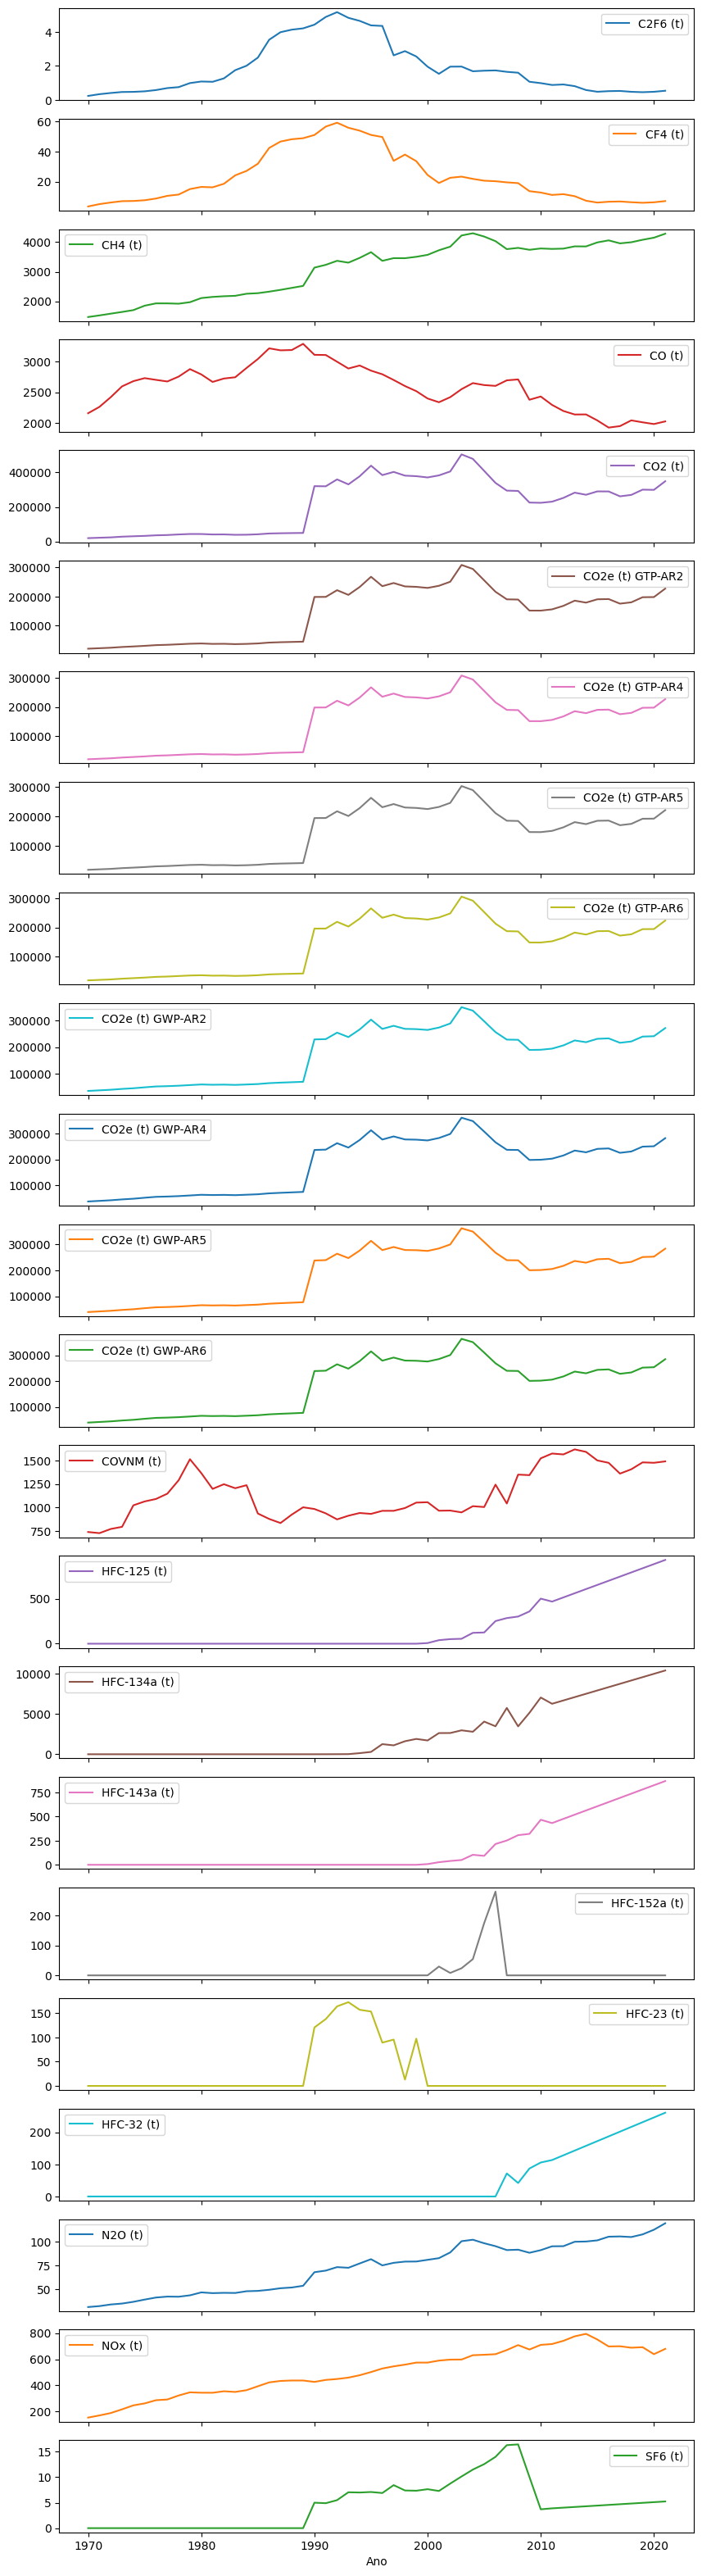

In [87]:
media_emissao_anual.plot(subplots = True, figsize=(10, 40));